In [1]:
i = 2;
load("2018级研究生小作业-阶未知线性差分方程输入输出数据\data00"+ i +"_OrderUnknown");


In [2]:
%del %延时

In [3]:
%na %A多项式阶次

In [4]:
%nb %B多项式阶次

In [5]:
%nc %c多项式阶次

In [6]:
%n_a = na;
%n_b = nb+del;
%n_c = nc;
rho = 0.99;

In [7]:
for n_a = 1:5
    for n_b = 1:5
        for n_c = 1:5
            %y = data(:,1,di);
            %u = data(:,2,di);
            [theta, P, xi] = rels(y,u,n_a,n_b,n_c,rho);
            aic = get_aic(xi, n_a+n_b+n_c+1);
            aic_arr(n_a,n_b,n_c) = aic;
        end
    end
end


In [8]:
aic_arr


aic_arr(:,:,1) =

   1.0e+03 *

    1.2384    1.1642    1.0897    1.0625    1.0743
    1.1933    1.0288    1.0055    1.0041    0.9988
    1.0405    0.5323   -0.4394   -0.0226    0.0990
    1.0436    0.2254   -0.0226   -0.0230    0.0995
    1.0322    0.1581    0.0991    0.0996    0.1003


aic_arr(:,:,2) =

   1.0e+03 *

    1.2193    1.1145    1.0906    1.0502    1.0495
    1.1813    1.0170    0.9846    0.9809    0.9833
    1.0377    0.5258   -0.4415   -0.0212    0.1007
    1.0401    0.2257   -0.0212   -0.0217    0.1010
    1.0270    0.1591    0.1007    0.1010    0.1021


aic_arr(:,:,3) =

   1.0e+03 *

    1.1901    1.0954    1.0926    1.0508    0.9913
    1.1493    0.9498    0.9320    0.9358    0.9258
    1.0343    0.5217   -0.4448   -0.0194    0.1025
    1.0377    0.2249   -0.0194   -0.0200    0.1026
    1.0137    0.1603    0.1026    0.1026    0.1039


aic_arr(:,:,4) =

   1.0e+03 *

    1.1455    1.0258    1.0200    0.9627    0.9622
    1.1292    0.9049    0.8887    0.8876    0.870

In [9]:
[min_aic,min_a,min_b,min_c] = min3d(aic_arr)


min_aic =

 -444.8063


min_a =

     3


min_b =

     3


min_c =

     3




In [10]:
theta = rels(y,u,3,3,3,rho)


theta =

    0.8962
    0.7480
    0.8001
   -0.0071
   -0.0087
    2.0018
    0.9857
    0.3073
   -0.1475
    0.0390




In [11]:
n_a = 3;
n_b = 3;
n_c = 3;

接下来我们要画那个迭代参数变化图。话说用最小二乘法的话哪来那个图。。

In [12]:
clear thetas

In [13]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;


for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    thetas(:,k) = theta;
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [14]:
size(thetas)
theta


ans =

    10   501


theta =

    0.8962
    0.7480
    0.8001
   -0.0071
   -0.0087
    2.0018
    0.9857
    0.3073
   -0.1475
    0.0390




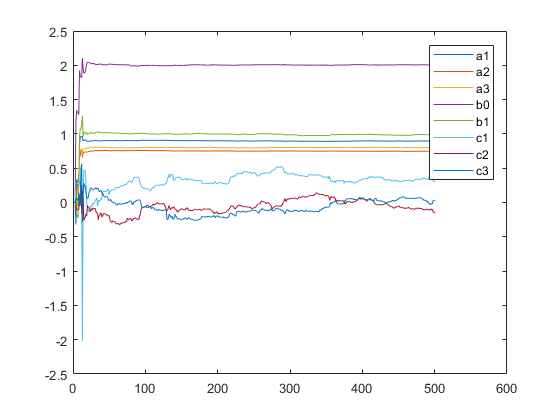

In [15]:
figure
plot(thetas(1,:));
hold on
plot(thetas(2,:));
plot(thetas(3,:));
plot(thetas(6,:));
plot(thetas(7,:));
plot(thetas(8,:));
plot(thetas(9,:));
plot(thetas(10,:));



hold off
legend('a1','a2','a3','b0','b1','c1','c2','c3')


In [16]:
n_a = 3;
n_b = 3;
n_c = 1;

In [17]:
clear thetas

In [18]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;


for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    thetas(:,k) = theta;
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [19]:
size(thetas)
theta


ans =

     8   501


theta =

    0.8961
    0.7480
    0.8000
   -0.0076
   -0.0075
    2.0016
    0.9865
    0.3053




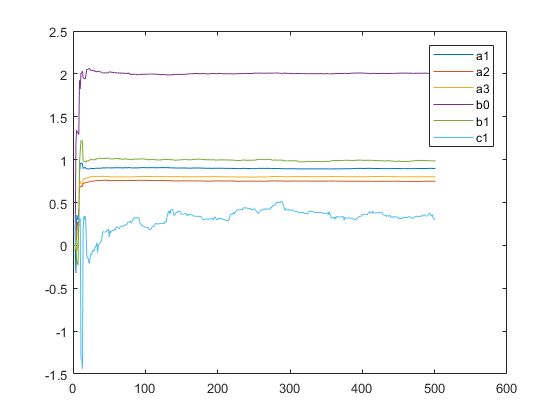

In [20]:
figure
plot(thetas(1,:));
hold on
plot(thetas(2,:));
plot(thetas(3,:));
plot(thetas(6,:));
plot(thetas(7,:));
plot(thetas(8,:));



hold off
legend('a1','a2','a3','b0','b1','c1')


In [21]:
n_a = 3;
n_b = 3;
n_c = 2;

In [22]:
clear thetas

In [23]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;


for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    thetas(:,k) = theta;
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [24]:
size(thetas)
theta


ans =

     9   501


theta =

    0.8961
    0.7480
    0.8001
   -0.0065
   -0.0084
    2.0017
    0.9855
    0.3055
   -0.1467




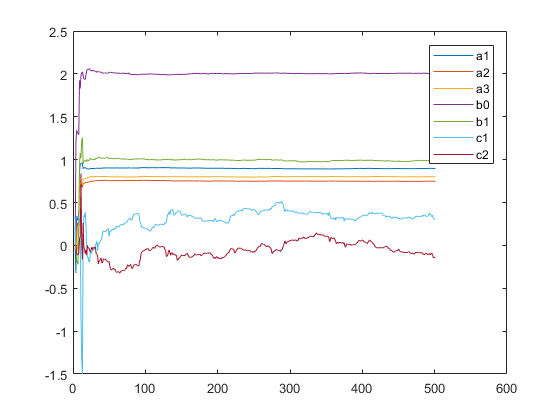

In [25]:
figure
plot(thetas(1,:));
hold on
plot(thetas(2,:));
plot(thetas(3,:));
plot(thetas(6,:));
plot(thetas(7,:));
plot(thetas(8,:));
plot(thetas(9,:));



hold off
legend('a1','a2','a3','b0','b1','c1','c2')


In [26]:
n_a = 3;
n_b = 3;
n_c = 4;

In [27]:
clear thetas

In [28]:
num_p = n_a + n_b + 1 + n_c;

theta = 1e-3 * ones(num_p, 1);
P = 1e6 * eye(num_p);
xi = y;


for k = max([n_a n_b n_c])+1:size(u,1)
    x = [-y(k-1:-1:k-n_a) ; u(k:-1:k-n_b) ; xi(k-1:-1:k-n_c)];
    K = P * x /(rho + x' * P * x);
    theta = theta + K * (y(k) - x' * theta);
    thetas(:,k) = theta;
    P = 1/rho * (eye(num_p) - K * x') * P;
    xi(k) = y(k) - x' * theta;
end


In [29]:
size(thetas)
theta


ans =

    11   501


theta =

    0.8964
    0.7480
    0.8002
   -0.0077
   -0.0083
    2.0024
    0.9860
    0.2805
   -0.1583
    0.0542
   -0.0480




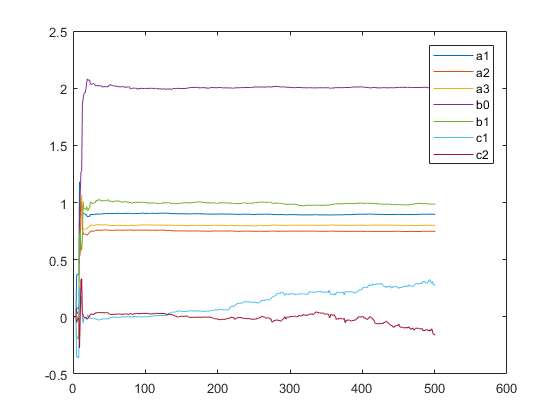

In [30]:
figure
plot(thetas(1,:));
hold on
plot(thetas(2,:));
plot(thetas(3,:));
plot(thetas(6,:));
plot(thetas(7,:));
plot(thetas(8,:));
plot(thetas(9,:));



hold off
legend('a1','a2','a3','b0','b1','c1','c2')


考虑到老师在某个示意图里钦定了用带d延迟的方法，这里也用带d延迟的估计一下（也就是直接忽略到作为延迟的跳过的几列）

In [31]:
n_a = 3;
n_b = 3;
n_c = 3;
d = 2;

clear thetas

In [32]:
[theta, P, xi, thetas] = rels(y, u, n_a, n_b, n_c, 0.99);
size(thetas)
theta



ans =

    10   501


theta =

    0.8962
    0.7480
    0.8001
   -0.0071
   -0.0087
    2.0018
    0.9857
    0.3073
   -0.1475
    0.0390




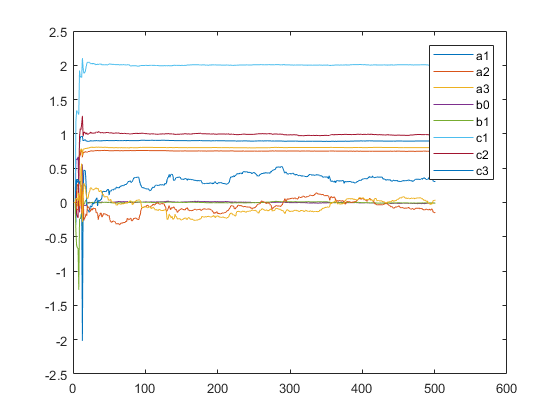

In [33]:
plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","c1","c2","c3"])

In [34]:
clear relsd


ans =

     8   501


theta =

    0.8958
    0.7476
    0.8000
    2.0017
    0.9863
    0.3131
   -0.1494
    0.0219




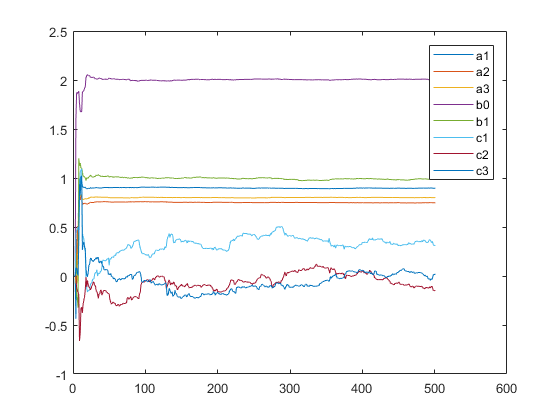

In [35]:
n_a = 3;
n_b = 3;
n_c = 3;
d = 2;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","c1","c2","c3"])

In [36]:
clear aic_arr

for n_a = 1:5
    for n_b = 1:5
        for n_c = 1:5
            for d = 0:n_b
                %y = data(:,1,di);
                %u = data(:,2,di);
                [theta, P, xi] = relsd(y, u, n_a, n_b, n_c, d, rho);
                aic = get_aic(xi, n_a+n_b+n_c+1-d);
                aic_arr(n_a,n_b,n_c,d+1) = aic;
            end
        end
    end
end


In [37]:
[min_aic,min_a,min_b,min_c,min_dd] = min4d(aic_arr)


min_aic =

 -444.8063


min_a =

     3


min_b =

     3


min_c =

     3


min_dd =

     1





ans =

     9   501


theta =

    0.8961
    0.7479
    0.8003
   -0.0073
    2.0014
    0.9867
    0.3085
   -0.1510
    0.0266


aic =

 -441.8295




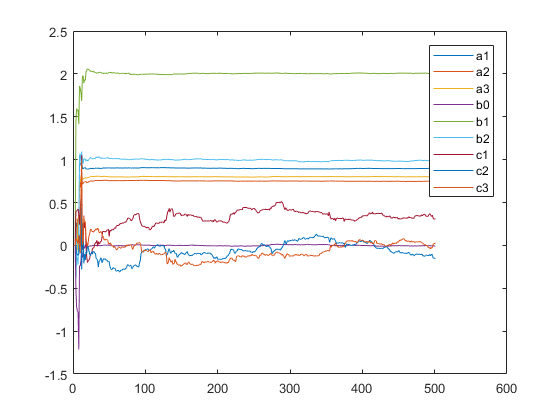

In [38]:
n_a = 3;
n_b = 3;
n_c = 3;
d = 1;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","b2","c1","c2","c3"])


ans =

     8   501


theta =

    0.8958
    0.7476
    0.8000
    2.0017
    0.9863
    0.3131
   -0.1494
    0.0219


aic =

 -440.0146




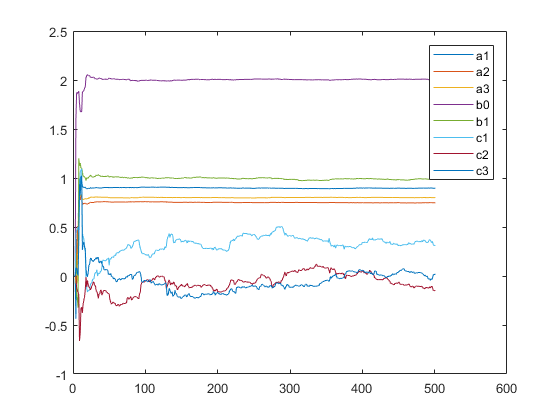

In [39]:
n_a = 3;
n_b = 3;
n_c = 3;
d = 2;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","c1","c2","c3"])


ans =

     7   501


theta =

    0.8957
    0.7476
    0.7999
    2.0017
    0.9860
    0.3127
   -0.1476


aic =

 -437.2393




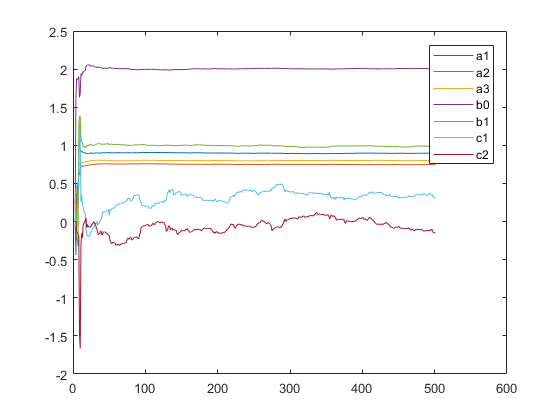

In [40]:
n_a = 3;
n_b = 3;
n_c = 2;
d = 2;

clear thetas

[theta, P, xi, thetas] = relsd(y, u, n_a, n_b, n_c, d, 0.99);
size(thetas)
theta
aic = get_aic(xi, n_a+n_b+n_c+1-d)

plot_trace(thetas, 1:length(theta), ["a1","a2","a3","b0","b1","c1","c2"])

虽然它说要做什么比较，但这种CARMA模型又不能直接用rls之类的方法估计（那里$c_k$之类的没办法处理），那比较什么，比较一些错误模型的结果？
倒确实有错误使用rls估计carma模型的比较在ppt中好像。